In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [19]:
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [21]:
reg.coef_

array([78.35063668])

In [22]:
reg.intercept_

26.15963284313262

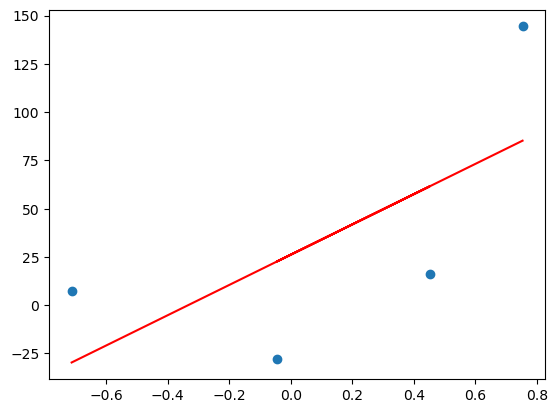

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red")
plt.show()

### Gradient Descent

In [24]:
# iteration 0:
b = 0
y_pred = ((78.35*X)+b).reshape(4)


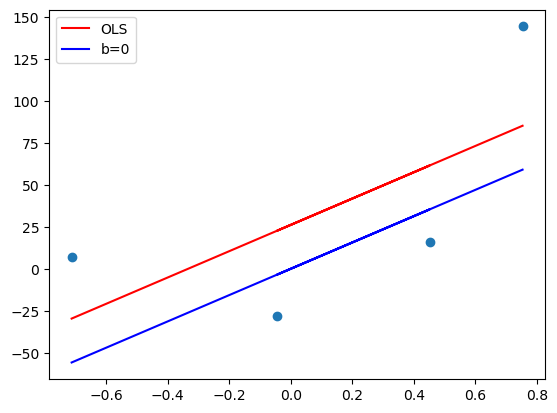

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred,color="blue",label ="b=0")
plt.legend()
plt.show()

In [26]:
m = 78.35
b = 0
loss_slope_wrt_b = -2 * np.sum(y - m*X.ravel()-b)
loss_slope_wrt_b

-209.27763408209216

In [27]:
# calculating step_size = slope * learning_rate
lr = 0.1
step_size = loss_slope_wrt_b*lr

In [28]:
b = b - step_size
b

20.927763408209216

In [37]:
y_pred1 = (78.35*X)+b

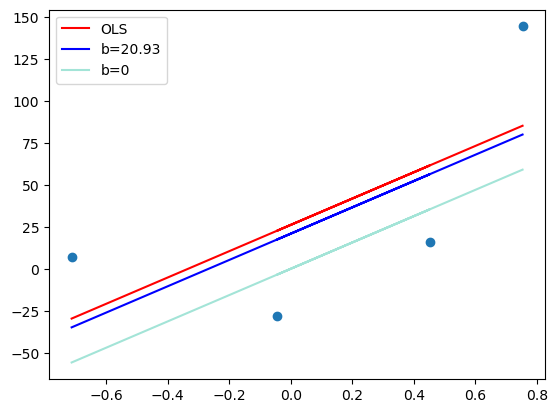

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred1,color="blue",label ="b={:.2f}".format(b))
plt.plot(X,y_pred,color="#A3E4D7",label ="b=0")
plt.legend()
plt.show()

In [39]:
# iteration 1
m = 78.35
lr = 0.1
loss_slope_wrt_b = -2 * np.sum(y-m*X.ravel()-b)
step_size = loss_slope_wrt_b * lr
b = b - step_size
y_pred2 = (78.35*X +b)

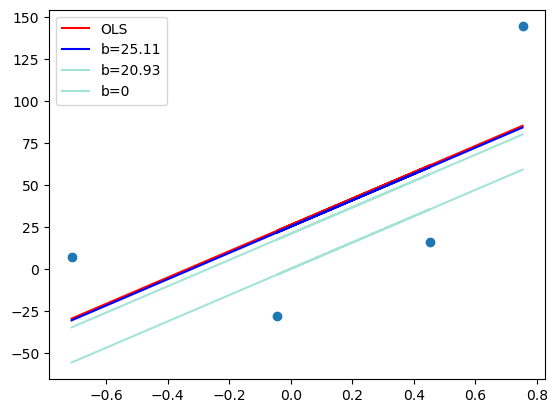

In [40]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color="red",label="OLS")
plt.plot(X,y_pred2,color="blue",label ="b={:.2f}".format(b))
plt.plot(X,y_pred1,color="#A3E4D7",label ="b=20.93")
plt.plot(X,y_pred,color="#A3E4D7",label ="b=0")
plt.legend()
plt.show()

```python
after few more iterations the old line converges with the new line 
```

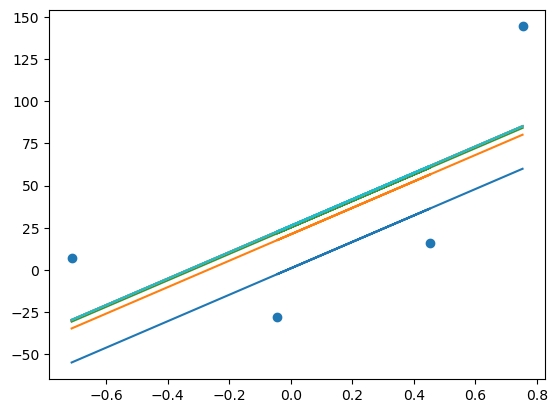

In [41]:
b = -100
m =78.35
lr = 0.1
epochs = 10
for i in range(epochs):
    loss_slope_wrt_b = -2 * np.sum(y-m*X.ravel()-b)
    step_size = loss_slope_wrt_b * lr
    b = b - step_size
    y_pred = (78.35*X +b)
    plt.plot(X,y_pred)
plt.scatter(X,y)

## Scratch

In [83]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=13)

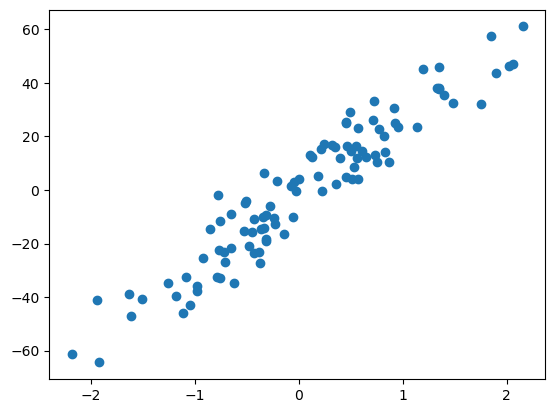

In [84]:
plt.scatter(X,y)
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.14257533]
-1.0443498830670506


In [91]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9178849619383831


In [92]:
class gdregressor:
    def __init__(self,learning_rate,epochs):
        self.m = 78.35
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_wrt_b = -2 * np.sum(y-self.m*X.ravel() - self.b)
            loss_slope_wrt_m = -2 * np.sum(y - self.m*X.ravel() - self.b)*X.ravel()

            self.b = self.b - (self.lr*loss_slope_wrt_b)
            self.m = self.m - (self.lr*loss_slope_wrt_m)
        print(self.m,self.b)
    def predict(self,X):
        return self.m * X + self.b  

In [93]:
gdr = gdregressor(0.01,100)

In [99]:
gdr.fit(X_train,y_train)

[-7.90741649e+84 -1.97395106e+84 -2.89423552e+84 -5.90028674e+84
  6.54771662e+84 -3.86443454e+84  3.19056399e+84 -1.53496925e+85
 -4.07368107e+84  5.15342925e+84 -4.66613629e+84  2.67326206e+84
  2.30820194e+84  1.92887188e+84  5.98348189e+84  4.40111772e+84
 -2.98371145e+84  2.63294876e+84  9.83763550e+84  2.61296595e+84
 -8.40424692e+83  5.91203684e+84 -1.05647326e+84 -1.12050326e+85
 -5.99149349e+84 -1.80460285e+84 -2.63365376e+84  4.77453755e+83
 -4.68599201e+84 -1.67240538e+85  2.76083270e+84 -4.26834783e+84
  9.02237768e+84 -4.67099178e+84 -3.76070400e+84 -6.05124878e+84
 -5.03151019e+84  2.01933271e+84  6.42880219e+84  3.69325221e+83
 -1.53484223e+84 -7.65441333e+84  1.59683474e+85  8.67544794e+84
 -1.12060127e+85 -9.44687693e+84  5.40303248e+84 -7.14708044e+84
  8.13516823e+84  1.81505833e+85  7.70413250e+84  1.61445426e+85
  1.25549035e+85  2.87644435e+84  3.99483836e+84  1.72076800e+84
  1.34035695e+85  3.62781456e+84 -1.16120965e+85 -3.29665376e+84
  6.28600515e+84  4.24873

In [97]:
y_pred_gdr = gdr.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9178849619383831
